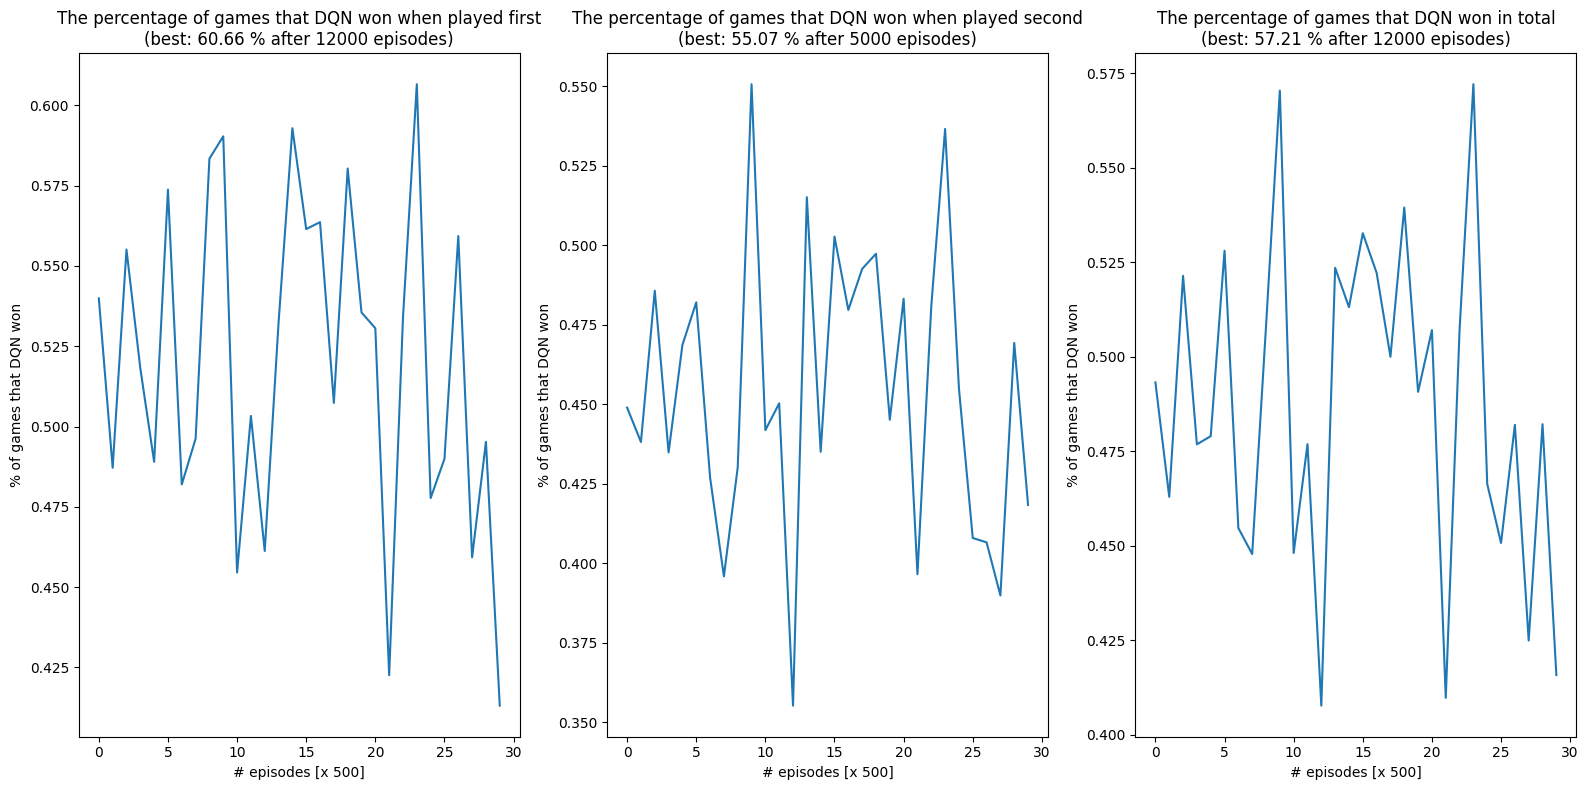

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('results.csv', header=None)
results = df.values

# Processing of game results against random

results_dqn_1 = results[::2,1:] # (30,3)
results_dqn_2 = results[1::2,1:]
results_dqn = results_dqn_1 + results_dqn_2

idx_1 = np.argmax(results_dqn_1[:,0])
idx_2 = np.argmax(results_dqn_2[:,0])
idx = np.argmax(results_dqn[:,0])

results_perc_1 = results_dqn_1[:,:2].astype(float)
sum = np.sum(results_perc_1, axis=1)
results_perc_1[:,0] = results_perc_1[:,0]/sum
results_perc_1[:,1] = results_perc_1[:,1]/sum

results_perc_2 = results_dqn_2[:,:2].astype(float)
sum = np.sum(results_perc_2, axis=1)
results_perc_2[:,0] = results_perc_2[:,0]/sum
results_perc_2[:,1] = results_perc_2[:,1]/sum

results_perc = results_dqn[:,:2].astype(float)
sum = np.sum(results_perc, axis=1)
results_perc[:,0] = results_perc[:,0]/sum
results_perc[:,1] = results_perc[:,1]/sum

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.plot(results_perc_1[:,0])
plt.xlabel('# episodes [x 500]')
plt.ylabel('% of games that DQN won')
plt.title("The percentage of games that DQN won when played first\n(best: {:.2f} % after {} episodes)".format(np.max(results_perc_1[:,0]*100),(idx_1+1)*500))
plt.subplot(1,3,2)
plt.plot(results_perc_2[:,0])
plt.xlabel('# episodes [x 500]')
plt.ylabel('% of games that DQN won')
plt.title("The percentage of games that DQN won when played second\n(best: {:.2f} % after {} episodes)".format(np.max(results_perc_2[:,0]*100),(idx_2+1)*500))
plt.subplot(1,3,3)
plt.plot(results_perc[:,0])
plt.xlabel('# episodes [x 500]')
plt.ylabel('% of games that DQN won')
plt.title("The percentage of games that DQN won in total\n(best: {:.2f} % after {} episodes)".format(np.max(results_perc[:,0]*100),(idx+1)*500))
plt.tight_layout()
plt.savefig('results.png')

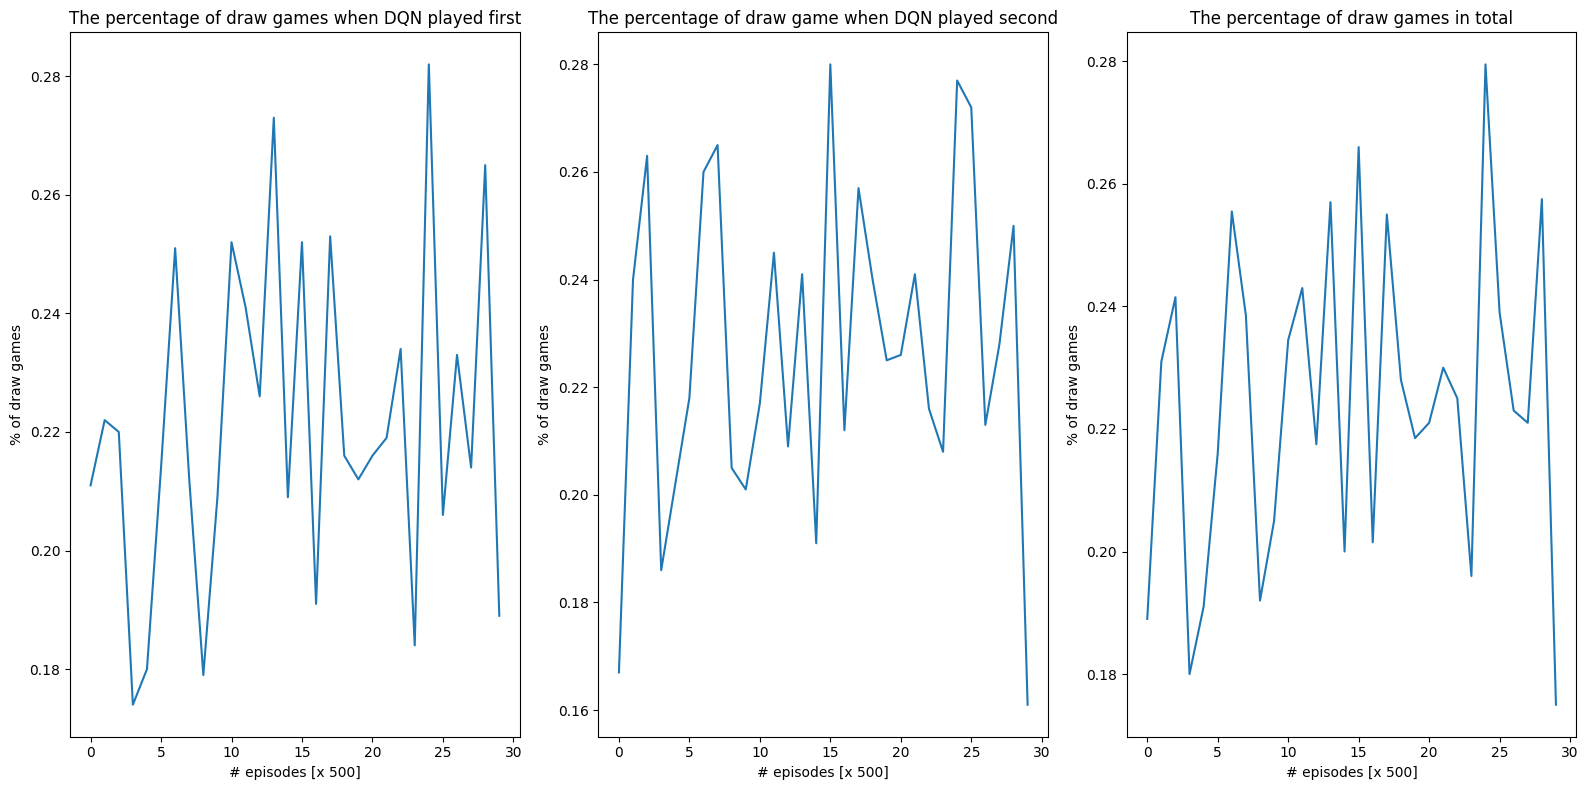

In [68]:
draw_dqn_1 = results_dqn_1[:,-1]/np.sum(results_dqn_1[0,:])
draw_dqn_2 = results_dqn_2[:,-1]/np.sum(results_dqn_2[0,:])
draw_dqn = results_dqn[:,-1]/np.sum(results_dqn[0,:])

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.plot(draw_dqn_1)
plt.xlabel('# episodes [x 500]')
plt.ylabel('% of draw games')
plt.title("The percentage of draw games when DQN played first")
plt.subplot(1,3,2)
plt.plot(draw_dqn_2)
plt.xlabel('# episodes [x 500]')
plt.ylabel('% of draw games')
plt.title("The percentage of draw game when DQN played second")
plt.subplot(1,3,3)
plt.plot(draw_dqn)
plt.xlabel('# episodes [x 500]')
plt.ylabel('% of draw games')
plt.title("The percentage of draw games in total")
plt.tight_layout()
plt.savefig('results_draw.png')